# HW 6 Simulated Annealing 1-d Placement

We will use the simple annealing helper simanneal (on conda forge) for this assignment. You can get away with tiny 
amounts of coding for an annealing process if you don't care slowly it runs, but building an efficient tool
requires thinking about the possible move set in terms of how much and how quickly it can reach arbitrary states. Additionally, you need to make the energy function (or incremental energy function) inexpensive to calculate if you can.
Look at the documentation for simanneal (or build an annealer yourself if you find that easier).

## Prob 1
Implement a SA based linear placement algorithm solving the problem that was so much fun in HW2. For this version,
initialize the state to a legal one (not necessarily a good one). Set the move() function to swap two random box positions, and Energy should be the total wire length as before. Start with the auto temperature scheduling as it is easiest.

Test your implementation on the cases below. (edge can be done with wirelength=66) The initial trial is effectively greedy descent. Why do you think this problem is so easy for SA?

In [1]:
import simanneal as sa

In [2]:
# Import Pandas, numpy and Networkx
import numpy as np
import pandas as pd
import networkx as nx
import scipy as sp
import sys
import random
import math
import itertools
import time
import collections
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

In [3]:
from __future__ import print_function
from collections import defaultdict
from simanneal import Annealer

In [4]:
dir(Annealer)

['Tmax',
 'Tmin',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'anneal',
 'auto',
 'best_energy',
 'best_state',
 'copy_state',
 'copy_strategy',
 'default_update',
 'energy',
 'load_state',
 'move',
 'save_state',
 'save_state_on_exit',
 'set_schedule',
 'set_user_exit',
 'start',
 'steps',
 'update',
 'updates',
 'user_exit']

In [5]:
N=20
edge = [[0, 1], [0, 10], [0, 11], [0, 13], [0, 16], [0, 18], [2, 7], [2, 8], [2, 11], [2, 12], [2, 13],
 [3, 7], [3, 10], [3, 13], [4, 5], [4, 18], [5, 9], [6, 7], [6, 10], [8, 10], [8, 13], [9, 17],
 [10, 11], [10, 14], [11, 14], [13, 17], [17, 19]]
edge1 = [[0,2],[0,5],[1,2],[1,5],[1,9],[2,3],[2,5],[3,4],[4,12],[5,7],[6,9],[9,14],[10,11],[10,13],[11,14],[11,15],
         [12,14],[13,15],[13,19],[14,15],[15,17],[16,17],[16,18],[18,19]]

In [6]:
G = nx.Graph()
G.add_edges_from(edge)
G.add_nodes_from([i for i in range(0,N)])

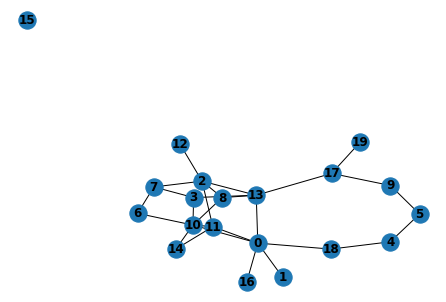

In [7]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [8]:
A = nx.adjacency_matrix(G)
Adj = A.todense()
Adj

matrix([[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [ ]:
# Locations are indices in the pos list, and each node to unique location mapping

# A random assignment of boxes to location
def loc_init(N):
    
    pos = [i for i in range(0,N)]
    random.shuffle(pos)
    return pos

In [ ]:
init_state = loc_init(N)
print(init_state)

In [ ]:
temp_init = 1000
temp_end = 0.1
energy = 0

# Calculate initial energy
for i in range(0,N):
    for j in range(i+1,N):
        if ([init_state[i], init_state[j]] in edge) or ([init_state[j], init_state[i]] in edge):
            # print([pos[i], pos[j]], j-i)
            energy += j-i
                      
print("Initial System energy is", energy)

In [ ]:
# Adapted from https://github.com/perrygeo/simanneal

class LinearPlacement(Annealer):
    # pass edge data into the constructor
    def __init__(self, state, edge):
        self.edge = edge
        super(LinearPlacement, self).__init__(state)  # important!

    def move(self):
        """Swaps two blocks in the list."""
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the total energy of the input state"""
        e = 0
        for i in range(len(self.state)):
            for j in range(i+1,len(self.state)):
                if ([self.state[i], self.state[j]] in self.edge) or ([self.state[j], self.state[i]] in self.edge):
                    e += j-i
        return e

In [ ]:
LP = LinearPlacement(init_state, edge)
LP.set_schedule(LP.auto(minutes=0.3))
final_state, final_energy = LP.anneal()

In [ ]:
print("final state with auto schedule is", final_state)
print("final energy with auto schedule is", final_energy)

In [ ]:
LP.Tmax = 20000  # Max (starting) temperature
LP.Tmin = 0.001      # Min (ending) temperature
LP.steps = 100000   # Number of iterations
LP.updates = 100   # Number of updates (by default an update prints to stdout)
# since our state is just a list, slice is the fastest way to copy
LP.copy_strategy = "slice"
final_state, final_energy = LP.anneal()

In [ ]:
print("final state with specified schedule is", final_state)
print("final energy with specified scheduleis", final_energy)

## Prob 2
Resurrect your random graph code from HW 4 (Graph Coloring). Implement graph coloring using SA on random graphs of sizes 15 and 30 nodes at density 0.4 and compare your solutions to optimal ones from SAT. 
* a) The simplest strategy here is similar to the fixed color problem we did using SAT: Randomly partition the vertexes of the graph into k colors, create a penalty function that counts the number of bad edges. Let your move function choose a vertex of a bad edge and place it in a new color class among the fixed set of colors. Note: if you ever make the number of bad edges 0, stop!
* b) An alternative approach goes directly for the minimal number of colors: Partition the vertexes into k color classes as before. A legal move takes a random vertex into a random new color class of k+1 colors (i.e. if it moves to k+1 it is the first vertex in that color partition). The trick here is to build the cost carefully: $E = -\sum_{i=1}^k |C_i|^2 + \sum_{i=1}^k 2|C_i|\cdot|B_i|$ where $|C_i|$ is the number of vertexes in color class $i$ and $|B_i|$ is the number of bad edges in color class $i$. This approach tends to anneal to small color number as a side effect of the minimization of bad edges.

Choose one of the techniques. Start small, with graphs of 10-20 nodes, and densities of 0.5. Setup your cooling strategy and tune parameters as a trade-off of solution quality versus run time. Use SAT to determine the actual minimal color and see how close you can come for graphs of 50 nodes or so. (Note: annealing is not likely to outperform SAT for any problem scale you are likely to be willing to run, especially if you symmetry break the instance.) 


In [9]:
''' Number of iterations determine the quality of solution given a temperature schedule: and hence directly impact run time'''

' Number of iterations determine the quality of solution given a temperature schedule: and hence directly impact run time'

In [10]:
num_colors = 5  # Dummy test value
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import itertools
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = dict(itertools.islice(colors.items(), num_colors))
color_vals = list(colors.values())
print(color_vals)

[(0, 0, 1), (0, 0.5, 0), (1, 0, 0), (0, 0.75, 0.75), (0.75, 0, 0.75)]


In [ ]:
class Graphcoloring(Annealer):
    # pass edge data into the constructor
    def __init__(self, N, k, edge):
        self.edge = edge
        self.N = N
        self.k = k
        self.state = self.init_partition(self.N, self.k)
        self.cmap_construct()
        self.bad_edge = list()
        self.bad_edge = self.bad_edges()
        print("Initial state with", k, "color partitions", self.state)
        print("Initial color mapping with", k, "color partitions", self.node_cmap)
        # print("Bad edges", self.bad_edge)
        
        super(Graphcoloring, self).__init__(self.state)  # important!
    
    def bad_edges(self):
        bad_edge = []
        for eg in self.edge:
            if self.node_cmap[eg[0]] == self.node_cmap[eg[1]] :
                bad_edge.append(eg)
        temp1 = list(map(lambda x: tuple(sorted(x)),bad_edge))
        bad_edge = [list(ele) for ele in temp1]
        return bad_edge
    
    def init_partition(self, N, k):
        data = np.arange(N)
        random.shuffle(data)
        split_points = np.random.choice(N - 2, k - 1, replace=False) + 1
        split_points.sort()
        init_state = np.split(data, split_points)
        print("Init state", init_state)
        result =[]
        for items in init_state:
            result.append(items.tolist())        
        return result
    
    def cmap_construct(self):      # ORIGINALLY TRIED UPDATING ORIGINAL HASH MAP: BUT THE ANNEALEAR RANDOMLY SHUFFLES STATE TO ESCAPE LOCAL MINIMA  
        self.node_cmap = dict()
        index = 0
        for items in self.state:
            for node in items:
                self.node_cmap[node] = index
            index += 1
        
    def move(self):
        """Swaps a node of the bad edges and move in the different color list."""
        initial_energy = self.energy()
        # print("State ", self.state)
        # print("Color map", self.node_cmap)
        self.cmap_construct()
        for edge in self.edge:
            if self.node_cmap[edge[0]] == self.node_cmap[edge[1]] :
                current_color = self.node_cmap[edge[0]]                
                chosen_node = random.choice([edge[0],edge[1]])
                lst = [i for i in range(self.k) ]
                lst.remove(current_color)
                new_color = random.choice(lst)
                
                try:
                    # print("Current State ", self.state)
                    # print("current Color map", self.node_cmap) 
                    # print("Current color", current_color)
                    # print("new color", new_color)
                    # print("Chosen node", chosen_node)
                    self.state[current_color].remove(chosen_node)
                    self.state[new_color].append(chosen_node)
                    # print("Modified State ", self.state)
                    self.node_cmap[chosen_node] = new_color
                    # print("new Color map", self.node_cmap)
                    
                except:
                    print(" ERRROORRRRR !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...................")
                    print(" Error State ", self.state)
                    print("Color map", self.node_cmap) 
                    print("Current color", current_color)
                    print("new color", new_color)
                    print("Chosen node", chosen_node)
                    sys.exit()

                
        return self.energy() - initial_energy

    def energy(self):
        
        """Energy is a penalty for system: Calculates the total number of bad edges and penalty increases quadratically"""
        e = 0
        penalty = 0
        for edge in self.edge:
            if self.node_cmap[edge[0]] == self.node_cmap[edge[1]] :
                penalty += 1
        
        e = penalty*2
        # if (e==0):
            # print("STOP!!!!")
        return e


In [11]:
edge.clear()
N =10
k = 30
def randgraph(N, d):
    
    for i in range(N):
        for j in range(N):
            if i!=j and random.randint(0, 1) <= d :
                edge.append([i,j])
    # print("edge", edge)
    return N, len(edge), edge            

In [12]:
def color_graph_plot(state, N):
    num_colors = len(state) 
    vertex_color = []
    for node in range(N):
        for j in range(0, num_colors):
            index = node*num_colors + j
            if solution[index] > 0:
                print("index here is:", index)

In [ ]:
''' IMPLEMENTATION TESTING : PERFORMANCE TESTS IN NEXT CELLS'''

density_list = [0.5]
Nstart = 5
Nend = 5
Nstep = 5
runs = 5
exec_times_N_d = []
chr_num_N_min = []
chr_num_N_max = []
chr_num_N_avg = []
exec_time_per_N = []
for N in range (Nstart, Nend+1, Nstep): 
    
    exec_time_for_d = []
    chr_num_per_d_min = []
    chr_num_per_d_max = []
    chr_num_per_d_avg = []
    
    for d in density_list:
        Chr_num_per_run= []        
        start = time.time()        
        for k in range(runs):
            edge.clear()
            
            print(" ############################# N =", N, "d =", d, "Run =", k+1, "###############################")
            N, M, edge = randgraph(N,d)
            G = nx.Graph()
            G.add_edges_from(edge)
            G.add_nodes_from([i for i in range(0,N)])
            nx.draw(G, with_labels=True, font_weight='bold')
            plt.title('Before Coloring')
            plt.show() 
            k = 1
            final_energy1 = 10000
            
            while final_energy1!= 0 and k < N-1 :              
                
                k= k+1
                print( "########################### K =", k, "###########################")
                
                GC = Graphcoloring(N, k, edge)
                GC.Tmax = 20000  # Max (starting) temperature
                GC.Tmin = 0.005      # Min (ending) temperature
                GC.steps = 100000 # Number of iterations
                GC.updates = 100   # Number of updates (by default an update prints to stdout)
                # since our state is just a list, slice is the fastest way to copy
                # GC.copy_strategy = "slice"
                # GC.set_schedule(GC.auto(minutes=0.1))
                final_state1, final_energy1 = GC.anneal()
                
            
            if final_energy1 !=0 :
                k= N
            num_colors = k
            print("number of colors", num_colors)
            
            colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
            colors = dict(itertools.islice(colors.items(), num_colors))
            color_vals = list(colors.values())
            print(color_vals)
            
            if final_energy1 == 0:
                node_cmap = dict()
                index = 0
                for items in final_state1:
                    for node in items:
                        node_cmap[node] = index
                    index += 1

                od = collections.OrderedDict(sorted(node_cmap.items()))
                my_list = list(od.values())
                vertex_color = []
                for value in my_list:
                    vertex_color.append(color_vals[value])
            else:
                vertex_color = color_vals[0:num_colors]
                
            # The networkx API has some weird bugs: HAD to add nodelist additionally in arguments
            nx.draw(G, with_labels=True, font_weight='bold', nodelist=[i for i in range(0,N)], node_color = vertex_color)
            plt.title('After coloring')
            plt.show()
            
            Chr_num_per_run.append(num_colors)
            
        end_time = time.time()
        exec_time = end_time - start
        exec_time_for_d.append(exec_time/ runs)
        
        chr_num_per_d_min.append(min(Chr_num_per_run))
        chr_num_per_d_max.append(max(Chr_num_per_run))
        chr_num_per_d_avg.append(np.mean(Chr_num_per_run))
        
    chr_num_N_min.append(chr_num_per_d_min)
    chr_num_N_max.append(chr_num_per_d_max)
    chr_num_N_avg.append(chr_num_per_d_avg)  
    exec_times_N_d.append(exec_time_for_d)
      

In [13]:
class Graphcoloring(Annealer):
    # pass edge data into the constructor
    def __init__(self, N, k, edge):
        self.edge = edge
        self.N = N
        self.k = k
        self.state = self.init_partition(self.N, self.k)
        self.cmap_construct()
        self.bad_edge = list()
        self.bad_edge = self.bad_edges()
        # print("Initial state with", k, "color partitions", self.state)
        # print("Initial color mapping with", k, "color partitions", self.node_cmap)
        # print("Bad edges", self.bad_edge)
        
        super(Graphcoloring, self).__init__(self.state)  # important!
    
    def bad_edges(self):
        bad_edge = []
        for eg in self.edge:
            if self.node_cmap[eg[0]] == self.node_cmap[eg[1]] :
                bad_edge.append(eg)
        temp1 = list(map(lambda x: tuple(sorted(x)),bad_edge))
        bad_edge = [list(ele) for ele in temp1]
        return bad_edge
    
    def init_partition(self, N, k):
        data = np.arange(N)
        random.shuffle(data)
        split_points = np.random.choice(N - 2, k - 1, replace=False) + 1
        split_points.sort()
        init_state = np.split(data, split_points)
        print("Init state", init_state)
        result =[]
        for items in init_state:
            result.append(items.tolist())        
        return result
    
    def cmap_construct(self):      # ORIGINALLY TRIED UPDATING ORIGINAL HASH MAP: BUT THE ANNEALEAR RANDOMLY SHUFFLES STATE TO ESCAPE LOCAL MINIMA  
        self.node_cmap = dict()
        index = 0
        for items in self.state:
            for node in items:
                self.node_cmap[node] = index
            index += 1
        
    def move(self):
        """Swaps a node of the bad edges and move in the different color list."""
        initial_energy = self.energy()
        # print("State ", self.state)
        # print("Color map", self.node_cmap)
        self.cmap_construct()
        for edge in self.edge:
            if self.node_cmap[edge[0]] == self.node_cmap[edge[1]] :
                current_color = self.node_cmap[edge[0]]                
                chosen_node = random.choice([edge[0],edge[1]])
                lst = [i for i in range(self.k) ]
                lst.remove(current_color)
                new_color = random.choice(lst)
                
                try:
                    # print("Current State ", self.state)
                    # print("current Color map", self.node_cmap) 
                    # print("Current color", current_color)
                    # print("new color", new_color)
                    # print("Chosen node", chosen_node)
                    self.state[current_color].remove(chosen_node)
                    self.state[new_color].append(chosen_node)
                    # print("Modified State ", self.state)
                    self.node_cmap[chosen_node] = new_color
                    # print("new Color map", self.node_cmap)
                    
                except:
                    print(" ERRROORRRRR !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...................")
                    print(" Error State ", self.state)
                    print("Color map", self.node_cmap) 
                    print("Current color", current_color)
                    print("new color", new_color)
                    print("Chosen node", chosen_node)
                    sys.exit()

                
        return self.energy() - initial_energy

    def energy(self):
        
        """Energy is a penalty for system: Calculates the total number of bad edges and penalty increases quadratically"""
        e = 0
        penalty = 0
        for edge in self.edge:
            if self.node_cmap[edge[0]] == self.node_cmap[edge[1]] :
                penalty += 1
        
        e = penalty*2
        # if (e==0):
            # print("STOP!!!!")
        return e


 ############################# N = 5 d = 0.3 Run = 1 ###############################


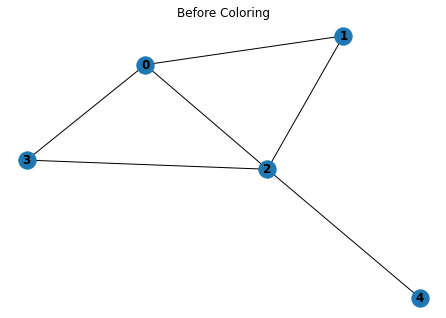

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  3226.87986         12.00   100.00%    25.40%     0:00:00     0:00:01

########################### K = 2 ###########################
Init state [array([2, 3]), array([1, 4, 0])]


     0.00500     -39938.00    74.60%    26.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
   283.43482          0.00   100.00%     0.00%     0:00:00     0:00:00

########################### K = 3 ###########################
Init state [array([4]), array([3]), array([2, 1, 0])]


     0.00500          0.00   100.00%     0.00%     0:00:01     0:00:00

number of colors 3
[(0, 0, 1), (0, 0.5, 0), (1, 0, 0)]


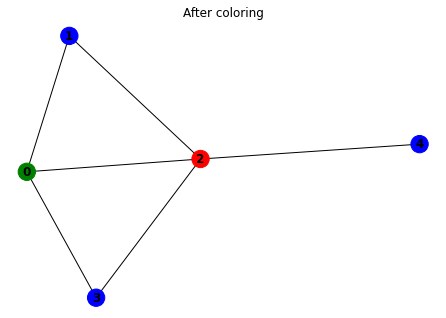

 ############################# N = 5 d = 0.4 Run = 1 ###############################


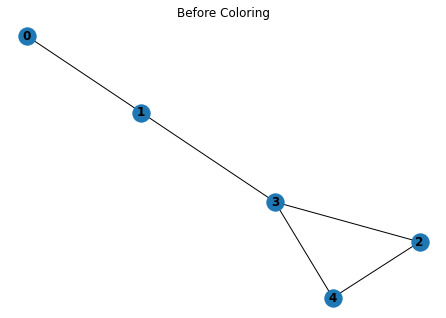

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  9352.48448          6.00   100.00%    24.20%     0:00:00     0:00:01

########################### K = 2 ###########################
Init state [array([0, 2, 4]), array([1, 3])]


     0.00500     -13880.00    74.00%    26.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
   243.46279          0.00   100.00%     0.00%     0:00:00     0:00:00

########################### K = 3 ###########################
Init state [array([1]), array([4]), array([2, 3, 0])]


     0.00500          0.00   100.00%     0.00%     0:00:01     0:00:00

number of colors 3
[(0, 0, 1), (0, 0.5, 0), (1, 0, 0)]


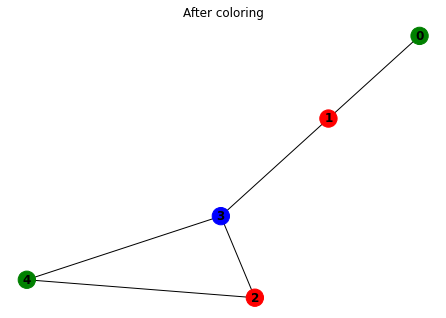

 ############################# N = 5 d = 0.5 Run = 1 ###############################


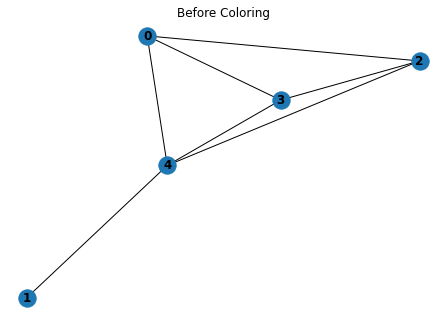

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


########################### K = 2 ###########################
Init state [array([4]), array([0, 3, 1, 2])]


     0.00500     -55200.00    67.40%    33.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  1296.16174          0.00   100.00%    26.20%     0:00:00     0:00:01

########################### K = 3 ###########################
Init state [array([4]), array([1, 0]), array([2, 3])]


     0.00500     -16808.00    73.20%    27.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
   329.96950          0.00   100.00%     0.00%     0:00:00     0:00:01

########################### K = 4 ###########################
Init state [array([1]), array([3]), array([2]), array([4, 0])]


     0.00500          0.00   100.00%     0.00%     0:00:01     0:00:00

number of colors 4
[(0, 0, 1), (0, 0.5, 0), (1, 0, 0), (0, 0.75, 0.75)]


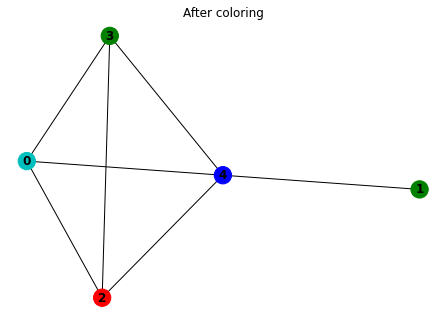

 ############################# N = 5 d = 0.6 Run = 1 ###############################


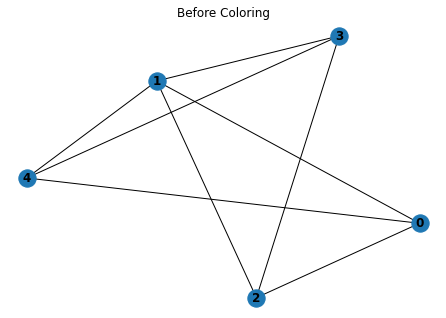

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 10887.98706        -16.00   100.00%    33.20%     0:00:00     0:00:01

########################### K = 2 ###########################
Init state [array([4]), array([3, 2, 0, 1])]


     0.00500     -65558.00    67.40%    29.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
   520.63768          0.00   100.00%     0.00%     0:00:00     0:00:01

########################### K = 3 ###########################
Init state [array([3]), array([1]), array([2, 0, 4])]


     0.00500          0.00   100.00%     0.00%     0:00:01     0:00:00

number of colors 3
[(0, 0, 1), (0, 0.5, 0), (1, 0, 0)]


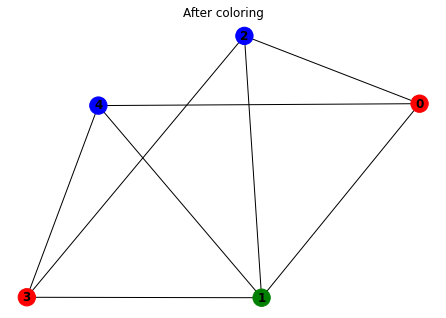

 ############################# N = 5 d = 0.7 Run = 1 ###############################


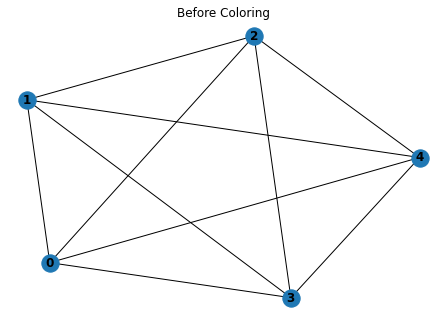

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 12675.59037          2.00    99.80%    32.60%     0:00:00     0:00:01

########################### K = 2 ###########################
Init state [array([0, 2, 1]), array([4, 3])]


     0.00500     -51244.00    70.60%    31.20%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  2045.13037          2.00   100.00%    32.60%     0:00:00     0:00:01

########################### K = 3 ###########################
Init state [array([4]), array([1, 0]), array([2, 3])]


     0.00500     -29310.00    62.80%    34.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  1756.71131          4.00   100.00%    23.00%     0:00:00     0:00:01

########################### K = 4 ###########################
Init state [array([4]), array([0]), array([1]), array([2, 3])]


     0.00500     -10310.00    75.80%    24.20%     0:00:01     0:00:00

number of colors 5
[(0, 0, 1), (0, 0.5, 0), (1, 0, 0), (0, 0.75, 0.75), (0.75, 0, 0.75)]


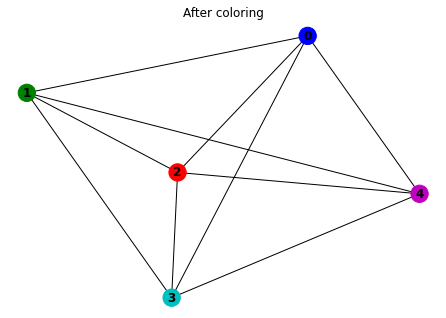

In [14]:
''' PERFORMANCE TESTS'''

density_list = [0.3, 0.4, 0.5, 0.6, 0.7]
Nstart = 5
Nend = 5
Nstep = 5
runs = 1
exec_times_N_d = []
chr_num_N_min = []
chr_num_N_max = []
chr_num_N_avg = []
exec_time_per_N = []
for N in range (Nstart, Nend+1, Nstep): 
    
    exec_time_for_d = []
    chr_num_per_d_min = []
    chr_num_per_d_max = []
    chr_num_per_d_avg = []
    
    for d in density_list:
        Chr_num_per_run= []        
        start = time.time()        
        for k in range(runs):
            edge.clear()
            
            print(" ############################# N =", N, "d =", d, "Run =", k+1, "###############################")
            N, M, edge = randgraph(N,d)
            G = nx.Graph()
            G.add_edges_from(edge)
            G.add_nodes_from([i for i in range(0,N)])
            nx.draw(G, with_labels=True, font_weight='bold')
            plt.title('Before Coloring')
            plt.show() 
            k = 1
            final_energy1 = 10000
            
            while final_energy1!= 0 and k < N-1 :              
                
                k= k+1
                print( "########################### K =", k, "###########################")
                
                GC = Graphcoloring(N, k, edge)
                GC.Tmax = 20000  # Max (starting) temperature
                GC.Tmin = 0.005      # Min (ending) temperature
                GC.steps = 50000 # Number of iterations
                GC.updates = 100   # Number of updates (by default an update prints to stdout)
                # since our state is just a list, slice is the fastest way to copy
                # GC.copy_strategy = "slice"
                # GC.set_schedule(GC.auto(minutes=0.1))
                final_state1, final_energy1 = GC.anneal()
                
            
            if final_energy1 !=0 :
                k= N
            num_colors = k
            print("number of colors", num_colors)
            
            colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
            colors = dict(itertools.islice(colors.items(), num_colors))
            color_vals = list(colors.values())
            print(color_vals)
            
            if final_energy1 == 0:
                node_cmap = dict()
                index = 0
                for items in final_state1:
                    for node in items:
                        node_cmap[node] = index
                    index += 1

                od = collections.OrderedDict(sorted(node_cmap.items()))
                my_list = list(od.values())
                vertex_color = []
                for value in my_list:
                    vertex_color.append(color_vals[value])
            else:
                vertex_color = color_vals[0:num_colors]
                
            # The networkx API has some weird bugs: HAD to add nodelist additionally in arguments
            nx.draw(G, with_labels=True, font_weight='bold', nodelist=[i for i in range(0,N)], node_color = vertex_color)
            plt.title('After coloring')
            plt.show()
            
            Chr_num_per_run.append(num_colors)
            
        end_time = time.time()
        exec_time = end_time - start
        exec_time_for_d.append(exec_time/ runs)
        
        chr_num_per_d_min.append(min(Chr_num_per_run))
        chr_num_per_d_max.append(max(Chr_num_per_run))
        chr_num_per_d_avg.append(np.mean(Chr_num_per_run))
        
    chr_num_N_min.append(chr_num_per_d_min)
    chr_num_N_max.append(chr_num_per_d_max)
    chr_num_N_avg.append(chr_num_per_d_avg)  
    exec_times_N_d.append(exec_time_for_d)
      

In [15]:
X = [density_list for i in range(Nstart, Nend +1, Nstep)]
X

[[0.3, 0.4, 0.5, 0.6, 0.7]]

############### EXECUTION TIME PLOTS #################


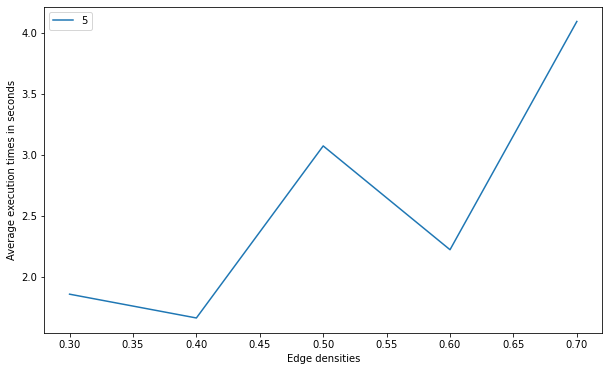

############### Min chromatic number PLOTS #################


<Figure size 720x432 with 0 Axes>

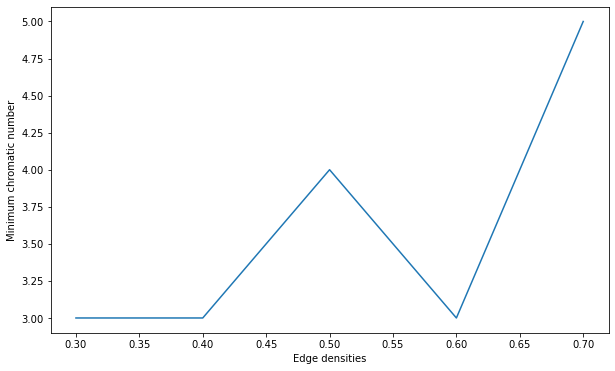

############### Max chromatic number PLOTS #################


<Figure size 720x432 with 0 Axes>

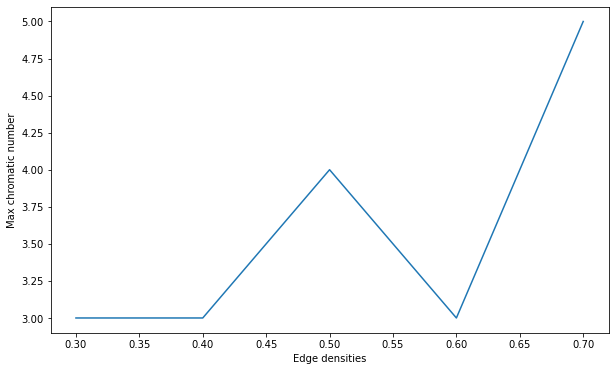

############### Avg chromatic number PLOTS #################


<Figure size 720x432 with 0 Axes>

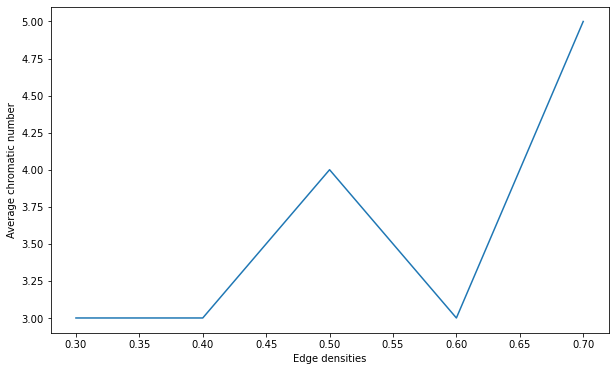

<Figure size 720x432 with 0 Axes>

In [20]:
try:
    import matplotlib.pyplot as plt
    from pylab import rcParams
    %matplotlib inline
    rcParams['figure.figsize'] = 10, 6
    
    # First plot : Execution times
    
    print ( "############### EXECUTION TIME PLOTS #################" )
    plt.figure()
    for i in range(len(X)):
        plt.plot(X[i], exec_times_N_d[i], label='N= %d' %(Nstart +Nstep*i) )
    plt.xlabel('Edge densities')
    plt.ylabel('Average execution times in seconds')
    plt.legend([i for i in range(Nstart, Nend +1, Nstep)])
    plt.show()
    plt.savefig('Avg_Exec_times.png', bbox_inches='tight')
        # First plot : Minimum chromatic number
    
    print ( "############### Min chromatic number PLOTS #################" )
    plt.figure()
    for i in range(len(X)):
        plt.plot(X[i], chr_num_N_min[i], label='N= %d' %(Nstart +Nstep*i) )
    plt.xlabel('Edge densities')
    plt.ylabel('Minimum chromatic number')
    plt.show()
    plt.savefig('Min_chromatic_num.png', bbox_inches='tight')
            # First plot : Maximum chromatic number
    
    print ( "############### Max chromatic number PLOTS #################" )
    plt.figure()
    for i in range(len(X)):
        plt.plot(X[i], chr_num_N_max[i], label='N= %d' %(Nstart +Nstep*i) )
    plt.xlabel('Edge densities')
    plt.ylabel('Max chromatic number')
    plt.show()
    plt.savefig('Max_chromatic_num.png', bbox_inches='tight')
    
            # First plot : Average chromatic number
    
    print ( "############### Avg chromatic number PLOTS #################" )
    plt.figure()
    for i in range(len(X)):
        plt.plot(X[i], chr_num_N_avg[i], label='N= %d' %(Nstart +Nstep*i) )
    plt.xlabel('Edge densities')
    plt.ylabel('Average chromatic number')
    plt.show()
    plt.savefig('Avg_chromatic_num.png', bbox_inches='tight')

except ImportError:
    print("matplotlib not found, nothing will be displayed")
    plt = None
    def display_solution(sol):   pass

## Problem 2: continued

Run your SA coloring algorithm on the following graph:


In [ ]:
N=30
edge=[[0, 1], [0, 2], [0, 4], [0, 6], [0, 7], [0, 10], [0, 12], [0, 15], [0, 18], [0, 19],
      [0, 21], [0, 22], [0, 23], [0, 24], [0, 27], [0, 28], [1, 2], [1, 3], [1, 7], [1, 9],
      [1, 10], [1, 11], [1, 12], [1, 15], [1, 16], [1, 17], [1, 19], [1, 21], [1, 22], [1, 23],
      [1, 24], [1, 25], [1, 28], [1, 29], [2, 3], [2, 4], [2, 11], [2, 12], [2, 13], [2, 15],
      [2, 17], [2, 18], [2, 21], [2, 23], [2, 24], [2, 26], [2, 27], [2, 28], [3, 4], [3, 5],
      [3, 6], [3, 9], [3, 10], [3, 11], [3, 12], [3, 15], [3, 16], [3, 19], [3, 24], [3, 25],
      [3, 26], [3, 27], [3, 29], [4, 5], [4, 6], [4, 7], [4, 10], [4, 12], [4, 15], [4, 21],
      [4, 22], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [5, 6], [5, 11], [5, 12],
      [5, 15], [5, 17], [5, 19], [5, 20], [5, 21], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27],
      [5, 28], [6, 7], [6, 8], [6, 9], [6, 13], [6, 15], [6, 19], [6, 20], [6, 25], [6, 27],
      [6, 29], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [7, 15], [7, 16],
      [7, 18], [7, 21], [7, 24], [7, 25], [7, 29], [8, 13], [8, 15], [8, 20], [8, 21], [8, 22],
      [8, 23], [8, 25], [8, 26], [8, 27], [8, 28], [9, 10], [9, 11], [9, 12], [9, 13], [9, 15],
      [9, 16], [9, 19], [9, 20], [9, 21], [9, 22], [9, 26], [10, 11], [10, 12], [10, 13], [10, 14],
      [10, 18], [10, 20], [10, 23], [10, 26], [10, 28], [10, 29], [11, 12], [11, 13], [11, 15], [11, 16],
      [11, 19], [11, 20], [11, 21], [11, 22], [11, 24], [11, 25], [11, 28], [11, 29], [12, 13], [12, 14],
      [12, 15], [12, 16], [12, 17], [12, 19], [12, 23], [12, 24], [12, 26], [12, 28], [12, 29], [13, 14],
      [13, 16], [13, 17], [13, 18], [13, 20], [13, 23], [13, 26], [13, 27], [13, 28], [14, 15], [14, 16],
      [14, 17], [14, 19], [14, 21], [14, 22], [14, 23], [14, 25], [15, 17], [15, 18], [15, 19], [15, 22],
      [15, 23], [15, 26], [15, 27], [15, 28], [15, 29], [16, 19], [16, 20], [16, 21], [16, 22], [16, 23],
      [16, 26], [16, 28], [17, 18], [17, 19], [17, 20], [17, 24], [17, 28], [18, 19], [18, 20], [18, 21],
      [18, 22], [18, 24], [18, 28], [18, 29], [19, 24], [19, 25], [19, 26], [19, 27], [20, 21], [20, 22],
      [20, 24], [20, 26], [20, 27], [21, 22], [21, 24], [21, 26], [21, 27], [21, 28], [21, 29], [22, 23],
      [22, 28], [22, 29], [23, 29], [24, 26], [24, 27], [24, 29], [25, 26], [25, 27], [26, 27], [27, 29]]

In [ ]:
G = nx.Graph()
G.add_edges_from(edge)
G.add_nodes_from([i for i in range(0,N)])
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('Before Coloring')
plt.show() 
k = 1
final_energy1 = 10000  # Dummy energy
start = time.time()

while final_energy1!= 0 and k < N-1 :              

    k= k+1
    print( "########################### K =", k, "###########################")

    GC = Graphcoloring(N, k, edge)
    GC.Tmax = 20000  # Max (starting) temperature
    GC.Tmin = 0.005      # Min (ending) temperature
    GC.steps = 50000 # Number of iterations
    GC.updates = 100   # Number of updates (by default an update prints to stdout)
    # since our state is just a list, slice is the fastest way to copy
    # GC.copy_strategy = "slice"
    # GC.set_schedule(GC.auto(minutes=0.1))
    final_state1, final_energy1 = GC.anneal()


if final_energy1 !=0 :
    k= N
num_colors = k
print("number of colors", num_colors)

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = dict(itertools.islice(colors.items(), num_colors))
color_vals = list(colors.values())
print(color_vals)

if final_energy1 == 0:
    node_cmap = dict()
    index = 0
    for items in final_state1:
        for node in items:
            node_cmap[node] = index
        index += 1

    od = collections.OrderedDict(sorted(node_cmap.items()))
    my_list = list(od.values())
    vertex_color = []
    for value in my_list:
        vertex_color.append(color_vals[value])
else:
    vertex_color = color_vals[0:num_colors]

# The networkx API has some weird bugs: HAD to add nodelist additionally in arguments
nx.draw(G, with_labels=True, font_weight='bold', nodelist=[i for i in range(0,N)], node_color = vertex_color)
plt.title('After coloring')
plt.show()


end_time = time.time()
exec_time = end_time - start
print("execution time is", exec_time )
print("Found minimum colors needed with Sim Annealing is 10")

## 50 node graph Analysis: SAT vs Simulated Annealing

In [ ]:
N = 50
d = 0.5
N, M, edge = randgraph(N,d)
G = nx.Graph()
G.add_edges_from(edge)
G.add_nodes_from([i for i in range(0,N)])
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('Before Coloring')
plt.show() 

In [ ]:
''' Simulated Annealing'''

k = 1
final_energy1 = 10000  # Dummy energy
start = time.time()

while final_energy1!= 0 and k < N-1 :              

    k= k+1
    print( "########################### K =", k, "###########################")

    GC = Graphcoloring(N, k, edge)
    GC.Tmax = 20000  # Max (starting) temperature
    GC.Tmin = 0.005      # Min (ending) temperature
    GC.steps = 50000 # Number of iterations
    GC.updates = 100   # Number of updates (by default an update prints to stdout)
    final_state1, final_energy1 = GC.anneal()

if final_energy1 !=0 :
    k= N
num_colors = k
print("number of colors", num_colors)

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = dict(itertools.islice(colors.items(), num_colors))
color_vals = list(colors.values())
print(color_vals)

if final_energy1 == 0:
    node_cmap = dict()
    index = 0
    for items in final_state1:
        for node in items:
            node_cmap[node] = index
        index += 1

    od = collections.OrderedDict(sorted(node_cmap.items()))
    my_list = list(od.values())
    vertex_color = []
    for value in my_list:
        vertex_color.append(color_vals[value])
else:
    vertex_color = color_vals[0:num_colors]

# The networkx API has some weird bugs: HAD to add nodelist additionally in arguments
nx.draw(G, with_labels=True, font_weight='bold', nodelist=[i for i in range(0,N)], node_color = vertex_color)
plt.title('After coloring')
plt.show()


end_time = time.time()
exec_time = end_time - start
print(" Execution time expended for Simulated Annealing is", exec_time)
print("Found minimum colors needed with Sim Annealing is", num_colors)

In [ ]:
import pycosat

In [ ]:
activate_constraint = 1
G = nx.Graph()
G.add_edges_from(edge)
G.add_nodes_from([i for i in range(0,N)])
A = nx.adjacency_matrix(G)
Adj = nx.to_numpy_array(G)
# nx.draw(G, with_labels=True, font_weight='bold')
# plt.title('Before Coloring')
# plt.show() 
# print(Adj)

max_sum= 0
clique_node = 1
for i in range(len(Adj)) :
    Sum = sum(Adj[i])
#     print(Sum)
    if Sum > max_sum:
        max_sum = Sum
        clique_node = i+1

print("Clique Node is", clique_node)
# print("Clique connections are", Adj[clique_node - 1])

index = 0
next_clique_node = 1
max_sum = 0
for connection in Adj[clique_node - 1]:

    if connection ==1:                    
        candidate_node = index
        Sum = sum(Adj[index])

        print(Sum)
        if Sum > max_sum:
            max_sum = Sum
            next_clique_node = index + 1
   #         print("Index here is", index)
    index += 1  

print("Next clique node is", next_clique_node)

    # IDEA is to iteratively search for minimum number of colors that can still 
# satisfy the constraints

# Best solution is binary search, keep going left until you reach unsatsifable and left=right

num_colors = N
start = time.time()
while num_colors >=2 :

    color_list = [i for i in range(num_colors)]

    # Defining a list(length = num_Colors) of binary variables for each node -- AS SAT problem
    # Zero-based indexing doesn't work --> -0 =0
    # One-based indexing

    cnf1 = []

    if activate_constraint == 1:
    # CONSTRAINT NEW : FIX COLOR FOR NODE 0                
        cnf1.append([(clique_node-1)*num_colors + 1])
        cnf1.append([(next_clique_node-1)*num_colors + 2])
    # Constraint 1: Every vertex can only get a unique color
    for i in range(0,N): # Every node
        for j in range(1,num_colors): # Traverse through color options --> equivalent number of constraints for a single node
            for k in range(j+1,num_colors+1):
                    cnf1.append([-(i*num_colors + j), -(i*num_colors + k) ])


    # Constraint 2: Choose one of the color in the palette
    for i in range(0,N):         
            cnf1.append([i*num_colors + j for j in range(1, num_colors+1)])

    # Constraint 3: For all edges: no two vertex share same colour
    for e in edge:
        # e[0] -> gives left-vertex, e[1] -> gives right-vertex
        for j in range(1,num_colors+1):
            cnf1.append([-((e[0])*num_colors +j), -((e[1])*num_colors +j)])

    # print(cnf1)
    tmp = pycosat.solve(cnf1)
    if tmp == "UNSAT":
        break
    solution = tmp
    num_colors -= 1

num_colors += 1
# print (solution)
print("N = ", N, "Min_colors", num_colors)


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = dict(itertools.islice(colors.items(), num_colors))
color_vals = list(colors.values())
print(color_vals)

vertex_color = []
for node in range(N):
    for j in range(0, num_colors):
        index = node*num_colors + j
        if solution[index] > 0:
            # print("index here is:", index)
            vertex_color.append(color_vals[(solution[index] -1) % (num_colors)])
# print(vertex_color)

# The networkx API has some weird bugs: HAD to add nodelist additionally in arguments
nx.draw(G, with_labels=True, font_weight='bold', nodelist=[i for i in range(0,N)], node_color = vertex_color )
plt.title('After coloring')
plt.show()


end_time = time.time()
exec_time = end_time - start
print(" Execution time expended for Simulated Annealing is", exec_time)
print("Found minimum colors needed with Sim Annealing is", num_colors)
      